## C - Implement a text data analysis (also known as text mining) of the field "description" from instagram_posts.csv for descriptions written in English. Use appropriate visualizations and statistics to highlight the words (and probably the topics) provided for the users in that field.

In [3]:
import pandas as pd
import datatable as dt
import enchant

In [4]:
descriptions = pd.read_csv("instagram_posts.csv", delimiter='\t', dtype = {'description': 'string'}, usecols=['description'], chunksize=100000)

In [5]:
p = descriptions.get_chunk(100000)

In [6]:
p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   description  91905 non-null  string
dtypes: string(1)
memory usage: 781.4 KB


In [22]:


def count_word(arr):
    d = enchant.Dict("en_US")
    counts = dict()
    for description in arr.iterrows():
        for word in description[1].to_string().split():
            #check if the word is in english
            if d.check(word) and len(word) > 2:
                if word in counts:
                    counts[word] += 1
                else:
                    counts[word] = 1
    return counts


In [23]:
dic = count_word(p)

In [24]:
dic.pop('description')

100003

In [25]:
arr = []
for x in dic.keys():
    if len(x) < 3:
        arr.append(x)

for x in arr:
    dic.pop(x)

In [26]:
arr

[]

In [27]:
from os import path
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


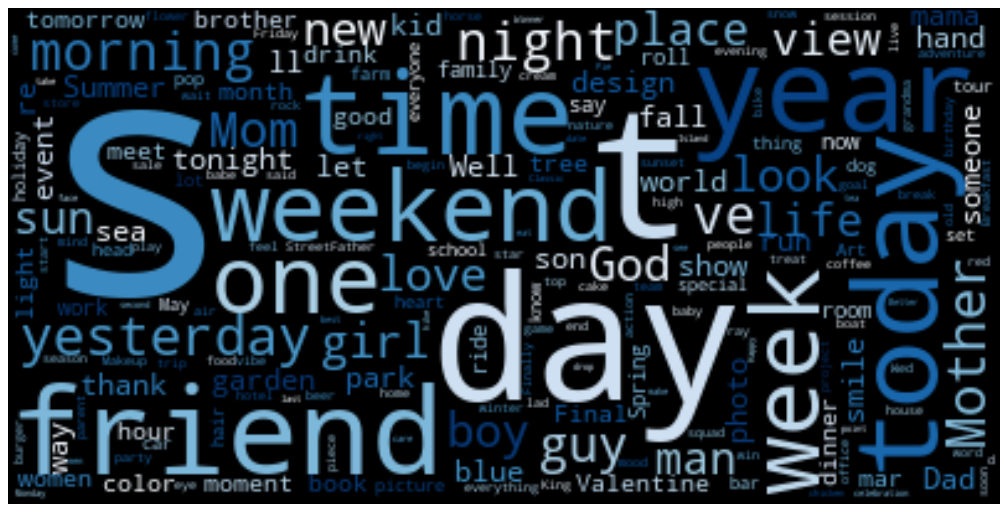

In [48]:

figure(figsize=(16, 12), dpi=80)
text = " ".join([(k + " ") for k,v in dic.items() if len(k) > 2])

text = text.replace('\'', "")
text = text.replace(".", "")
text = text.replace("-", "")

text = text.split()

text = " ".join([(k + " ") for k in text if len(k) > 2])




# Generate a word cloud image
wordcloud = WordCloud(colormap="Blues").generate(text)


# Display the generated image:
# the matplotlib way
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
